In [104]:
import pandas as pd
import numpy as np
import cv2

In [105]:
data_path = "Galaxy_data/training_solutions_rev1.csv" 
data = pd.read_csv(data_path)

data.head(5)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [106]:
# mask = ["GalaxyID", "Class1.1", "Class1.2", "Class6.1"]

mask = ["GalaxyID", "Class1.1", "Class1.2", "Class6.1"]

df = data[mask]

In [107]:
df

,GalaxyID,Class1.1,Class1.2,Class6.1
0,100008,0.383147,0.616853,0.054453
1,100023,0.327001,0.663777,0.189149
2,100053,0.765717,0.177352,0.000000
3,100078,0.693377,0.238564,0.320398
4,100090,0.933839,0.000000,0.029383
...,...,...,...,...
61573,999948,0.510379,0.489621,0.245734
61574,999950,0.901216,0.098784,0.127644
61575,999958,0.202841,0.777376,0.839186
61576,999964,0.091000,0.909000,0.864000


In [108]:
# def add_extension(filename):
#     return f"{filename}.jpg"

# # rename imgs with extension
# df["GalaxyID"] = df["GalaxyID"].apply(add_extension)

df.head(5)

,GalaxyID,Class1.1,Class1.2,Class6.1
0,100008,0.383147,0.616853,0.054453
1,100023,0.327001,0.663777,0.189149
2,100053,0.765717,0.177352,0.000000
3,100078,0.693377,0.238564,0.320398
4,100090,0.933839,0.000000,0.029383


In [109]:
# Creating a new dataframe with galaxies having a probability p in either class1.1 or class1.2

def df_filter(data, p):
    new_df = data[  (  (data["Class1.1"] >= p) | (data["Class1.2"] >= p) |  (data["Class6.1"] >= p) )  ]
    new_df.reset_index(drop=True)
    return new_df

new_df = df_filter(df, .6)
    
print(new_df.shape)
new_df.head(5)

(49771, 4)


,GalaxyID,Class1.1,Class1.2,Class6.1
0,100008,0.383147,0.616853,0.054453
1,100023,0.327001,0.663777,0.189149
2,100053,0.765717,0.177352,0.000000
3,100078,0.693377,0.238564,0.320398
4,100090,0.933839,0.000000,0.029383


In [110]:
new_df.shape

(49771, 4)

In [111]:
# to reomve any diplicate data
# new_df.drop_duplicates(inplace=True)
new_df = new_df.loc[~new_df.duplicated(), :]
new_df.shape

(49771, 4)

In [112]:
# to check is any data is null
new_df.isnull().sum().sum()

0

In [113]:
# define conditions 
def conditions(data, p):
    return [data["Class1.1"] >= p, data["Class1.2"] >= p, data["Class6.1"] >= p]

In [114]:
conditions = conditions(new_df, 0.8)
conditions

[0        False
 1        False
 2        False
 3        False
 4         True
          ...  
 61570    False
 61574     True
 61575    False
 61576    False
 61577    False
 Name: Class1.1, Length: 49771, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 61570    False
 61574    False
 61575    False
 61576     True
 61577    False
 Name: Class1.2, Length: 49771, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 61570     True
 61574    False
 61575     True
 61576     True
 61577    False
 Name: Class6.1, Length: 49771, dtype: bool]

In [115]:
choices = ["E", "S", "O"]

In [116]:
#create new column in DataFrame that displays results of comparisons
# new_df["Class"] = np.select(conditions, choices)
new_df.loc[:, "Class"] = np.select(conditions, choices)

new_df

,GalaxyID,Class1.1,Class1.2,Class6.1,Class
0,100008,0.383147,0.616853,0.054453,0
1,100023,0.327001,0.663777,0.189149,0
2,100053,0.765717,0.177352,0.000000,0
3,100078,0.693377,0.238564,0.320398,0
4,100090,0.933839,0.000000,0.029383,E
...,...,...,...,...,...
61570,999893,0.410999,0.519560,0.801448,O
61574,999950,0.901216,0.098784,0.127644,E
61575,999958,0.202841,0.777376,0.839186,O
61576,999964,0.091000,0.909000,0.864000,S


In [117]:
# counting how many s and e in the dataset
print(new_df[new_df["Class"] == "E"].shape)
print(new_df[new_df["Class"] == "S"].shape)
print(new_df[new_df["Class"] == "O"].shape)

(8132, 5)
(16141, 5)
(1323, 5)


In [118]:
# number of samples to use
sample_batch = 1323

In [119]:
# making balanced dfs
df_s = new_df[new_df["Class"] == "S"].sample(n = sample_batch)
df_e = new_df[new_df["Class"] == "E"].sample(n = sample_batch)
df_o = new_df[new_df["Class"] == "O"].sample(n = sample_batch)


print("This is a sample of spiral galaxies")
print(df_s.head(5))
print(df_s.shape)

print("And this is a sample of elliptical galaxies")
print(df_e.head(5))
print(df_e.shape)

print("And this is a sample of artifacts galaxies")
print(df_o.head(5))
print(df_o.shape)

This is a sample of spiral galaxies
       GalaxyID  Class1.1  Class1.2  Class6.1 Class
28754    521618  0.154490  0.834939  0.340484     S
10433    254860  0.164325  0.835675  0.252310     S
53199    875955  0.000000  0.985633  0.224393     S
27671    505344  0.135309  0.864691  0.306627     S
15102    323673  0.064019  0.935981  0.000000     S
(1323, 5)
And this is a sample of elliptical galaxies
       GalaxyID  Class1.1  Class1.2  Class6.1 Class
56504    925297  0.954046  0.022977  0.233000     E
31511    562387  0.802102  0.169851  0.305475     E
14777    318827  0.906000  0.094000  0.344000     E
39421    674618  0.858219  0.113379  0.056040     E
49355    818676  0.828787  0.171213  0.028594     E
(1323, 5)
And this is a sample of artifacts galaxies
       GalaxyID  Class1.1  Class1.2  Class6.1 Class
8779     229508  0.489250  0.466174  0.815269     O
35542    619459  0.439410  0.535067  0.848136     O
55226    906925  0.200468  0.777918  0.801330     O
61264    995300  0.721000

In [120]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49771 entries, 0 to 61577
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GalaxyID  49771 non-null  int64  
 1   Class1.1  49771 non-null  float64
 2   Class1.2  49771 non-null  float64
 3   Class6.1  49771 non-null  float64
 4   Class     49771 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.3+ MB


In [121]:
# merging the two dataframes together to make the traing dataframe
frames = [df_s, df_e, df_o]
df_galaxies = pd.concat(frames)
df_galaxies = df_galaxies[["GalaxyID", "Class"]]
print(df_galaxies.head(5))
print(df_galaxies.shape)

       GalaxyID Class
28754    521618     S
10433    254860     S
53199    875955     S
27671    505344     S
15102    323673     S
(3969, 2)


Text(0.5, 1.02, 'Class: E')

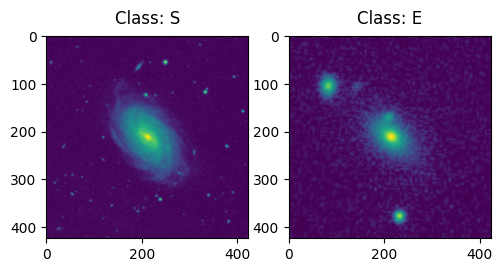

In [122]:
import matplotlib.pyplot as plt

IMG_DIR="Galaxy_data/images_training_rev1" 

# function that takes GalaxyID and check the class of it
def check_class(data, imgID):
    what = data[data["GalaxyID"] == imgID]
    return what["Class"]

# imgs test
img = cv2.imread(IMG_DIR + "/104934.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(IMG_DIR + "/582003.jpg", cv2.IMREAD_GRAYSCALE)

# visualize imgs
plt.figure(figsize=(12, 4.5))
plt.subplot(141)
plt.imshow(img)
plt.title(f"Class: {list(check_class(new_df, 104934))[0]}", y=1.02, fontsize=12)

plt.subplot(142)
plt.imshow(img2)
plt.title(f"Class: {list(check_class(new_df, 582003))[0]}", y=1.02, fontsize=12)

Text(0.5, 1.02, 'Class: E')

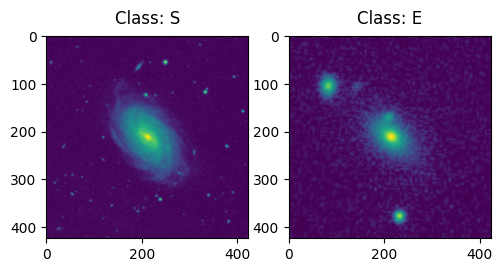

In [123]:
import matplotlib.pyplot as plt

IMG_DIR="Galaxy_data/images_training_rev1" 

# function that takes GalaxyID and check the class of it
def check_class(data, imgID):
    what = data[data["GalaxyID"] == imgID]
    
    return what["Class"]

# imgs test
img = cv2.imread(IMG_DIR + "/104934.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(IMG_DIR + "/582003.jpg", cv2.IMREAD_GRAYSCALE)

# visualize imgs
plt.figure(figsize=(12, 4.5))
plt.subplot(141)
plt.imshow(img)
plt.title(f"Class: {list(check_class(new_df, 104934))[0]}", y=1.02, fontsize=12)

plt.subplot(142)
plt.imshow(img2)
plt.title(f"Class: {list(check_class(new_df, 582003))[0]}", y=1.02, fontsize=12)

In [124]:
new_df[new_df["GalaxyID"] == 104934]

,GalaxyID,Class1.1,Class1.2,Class6.1,Class
337,104934,0.0,0.975,0.077,S


In [125]:
new_df[new_df["GalaxyID"] == 582003]["Class"]

32857    E
Name: Class, dtype: object

In [126]:
# import os
# import sys 
# import cv2
# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec
# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA


# IMG_DIR="Galaxy_data/images_training_rev1" 
# MEAN_IMG="mean.jpg"

# # the zooming factor
# zoom_factor = 2

# print("Processing...")
# original_galaxy_imgs = {}
# cropped_galaxy_imgs = {}
# cropped_galaxy_imgs_flat = {}
# count = 1
# total = 240 #len(os.listdir(IMG_DIR))

# for img in os.listdir(IMG_DIR):
#     if count == total + 1:
#         break
#     sys.stdout.write("\r" + str(count) + " / " + str(total))
#     sys.stdout.flush()

#     # preprocessing images: reading, zooming, cropping
#     img_array = cv2.imread(os.path.join(IMG_DIR, img), cv2.IMREAD_GRAYSCALE)
#     img_pil = Image.fromarray(img_array)
#     img_256x256 = np.array(img_pil.resize((256, 256), Image.Resampling.NEAREST))
#     zoomed_img_256x256 = cv2.resize(img_256x256, None, fx=zoom_factor, fy=zoom_factor)
#     crop_x, crop_y, crop_width, crop_height = 128, 128, 256, 256  
#     cropped_img = zoomed_img_256x256[crop_y:crop_y + crop_height, crop_x:crop_x + crop_width]

#     # storing the images in dic dataframe: id of galaxy and its array
#     idx = int(os.path.splitext(img)[0])
#     original_galaxy_imgs[idx] = img_256x256
#     cropped_galaxy_imgs[idx] = np.array(cropped_img)
#     cropped_galaxy_imgs_flat[idx] = np.array(cropped_img).flatten()
#     count += 1

# # # saving the proccessed data
# # saving_path = "proccessed_data/"
# # np.save(saving_path + "original_galaxy_imgs.npy", original_galaxy_imgs)
# # np.save(saving_path + "cropped_galaxy_imgs.npy", cropped_galaxy_imgs)
# # np.save(saving_path + "cropped_galaxy_imgs_flat.npy", cropped_galaxy_imgs_flat)

# print()
# print("Done!")

# load data

In [127]:
saving_path = "proccessed_data/"
cropped_galaxy_imgs = np.load(saving_path + "cropped_galaxy_imgs.npy", allow_pickle=True).item()
original_galaxy_imgs = np.load(saving_path + "original_galaxy_imgs.npy", allow_pickle=True).item()
# pca_512 = np.load("./pca_512.npy", allow_pickle=True).item()

In [128]:
!ls

Classifying_galaxies_in_GALAXYZOO.ipynb  Mean.py	    script.py
Galaxy_data				 pca_512.npy	    scripts
image_processing.ipynb			 proccessed_data    test.ipynb
img_pca.py				 Project_bak.ipynb  trial.ipynb
mean.jpg				 Project.ipynb	    zak_nb.ipynb
mean.npy				 README.md


In [129]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# taking a sample for testing
n_per_class = sample_batch // len(df_galaxies['Class'].unique())

# take same number from each class
balanced_test = df_galaxies.groupby('Class', group_keys=False).apply(lambda x: x.sample(n=n_per_class, random_state=42))

# random sample from the balanced sample
test_df = balanced_test.sample(frac=1, random_state=42)

test_galaxy_id = test_df['GalaxyID'].tolist()
test_labels = test_df['Class'].tolist()
 
# galaxy_id = df_galaxies['GalaxyID'].tolist()
# labels = df_galaxies['Class'].tolist()

# Split the data into training and validation sets
train_files, valid_files, train_labels, valid_labels = train_test_split(test_galaxy_id, test_labels, test_size=0.2, random_state=42)

In [130]:
def data_prep(data, train_files, valid_files):
    X_train_pixels = np.array([data[key].flatten() for key in train_files])
    X_valid_pixels =  np.array([data[key].flatten() for key in valid_files])
    return X_train_pixels, X_valid_pixels

In [131]:
def data_prep_scale(data, train_files, valid_files):
    scaler = StandardScaler()
    X_train_pixels_scal = np.array([scaler.fit_transform(data[key]).flatten() for key in train_files])
    X_valid_pixels_scal =  np.array([scaler.fit_transform(data[key]).flatten() for key in valid_files])
    return X_train_pixels_scal, X_valid_pixels_scal

# change dataset here

In [132]:
X_train_pixels, X_valid_pixels = data_prep_scale(cropped_galaxy_imgs, train_files, valid_files)

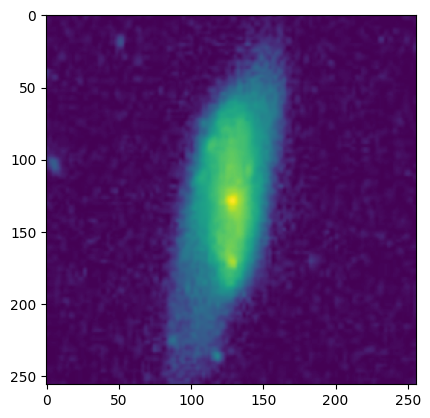

In [133]:
plt.imshow(cropped_galaxy_imgs[638491])

In [134]:
cropped_galaxy_imgs[977000].shape

(256, 256)

In [135]:

# call the random forest classifier from sckitlearn
RFC = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42, n_jobs = 4)
RFC.fit(X_train_pixels, train_labels)

# test predictions on the validation set
valid_pred = RFC.predict(X_valid_pixels)

# test the model
accuracy = accuracy_score(valid_labels, valid_pred)
print(f"Accuracy: {accuracy:.2f}")

# classification ifo
print("Classification Report:")
print(classification_report(valid_labels, valid_pred))

print("Confusion Matrix:")
print(confusion_matrix(valid_labels, valid_pred))

Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           E       0.72      0.81      0.76        98
           O       0.62      0.57      0.59        79
           S       0.71      0.67      0.69        88

    accuracy                           0.69       265
   macro avg       0.68      0.68      0.68       265
weighted avg       0.69      0.69      0.69       265

Confusion Matrix:
[[79 11  8]
 [18 45 16]
 [12 17 59]]


In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

n, m = 3, 3

mtx = np.random.randint(0, 100, size=(n, m))

mtx

array([[11, 54, 57],
       [17, 28, 64],
       [82, 25, 93]])

In [33]:
def plot_matrix(matrix):
    sns.heatmap(matrix, annot=True, linewidth=.5, cmap= 'coolwarm', xticklabels=['Elliptical', 'Spiral', 'Odd'], yticklabels=['Elliptical', 'Spiral', 'Odd'])
    plt.show()

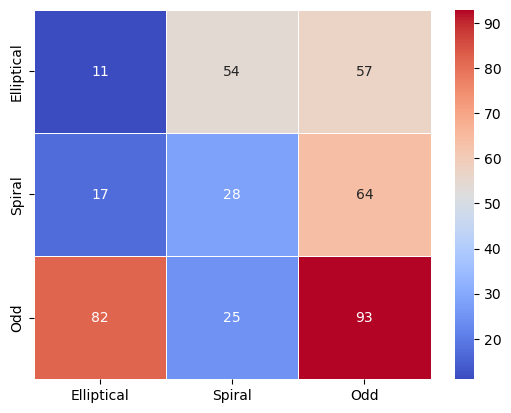

In [34]:
plot_matrix(mtx)